<a href="https://colab.research.google.com/github/nicoleineza/28442025_churning_customers/blob/main/Ineza_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing libraries

In [ ]:
import pandas as pd
import seaborn as sns
import keras
import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib  import  pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance
from keras.optimizers import Adam, Nadam,Adamax,Adagrad,RMSprop,SGD,Adadelta
from keras.layers import Input,Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split,GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, make_scorer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.losses import BinaryCrossentropy


In [ ]:
pip install scikeras

In [ ]:
from scikeras.wrappers import KerasClassifier

# loading the data into the model

In [ ]:
tdata = pd.read_csv('drive/My Drive/AI/Assignment 3/CustomerChurn_dataset.csv')


In [ ]:
# checking the number of colums and their datatypes
tdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
tdata['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [ ]:
tdata.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [ ]:
tdata.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
#finding the total null values
tdata.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
#checking for duplicates in the dataset
tdata.loc[tdata.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [ ]:
tdata.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
#converting total charges to numeric since it has numerical values but in the dataset is of type object
tdata['TotalCharges'] = pd.to_numeric(tdata['TotalCharges'], errors='coerce')
tdata['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [ ]:
#counting the number of null values in the colum Totalcharges
null_values = tdata['TotalCharges'].isnull().sum()
null_values

11

In [ ]:
#filling null values of  totalcharges with mean
mean_total_charges = tdata['TotalCharges'].mean()
tdata['TotalCharges'].fillna(mean_total_charges, inplace=True)


In [ ]:
tdata.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Separation of numerical and categorical data
identify the categorical and put them in one subset dataframe
identify the numerical data and put them in one subset dataframe
encode the categorical data to make them numeric
Concatinate the the two dataset to form the final dataset

In [ ]:
# numerical data
numedata = tdata.select_dtypes(exclude=['object'])

In [ ]:
# categical data
catedata = tdata.select_dtypes(include =['object'])

In [ ]:
numedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SeniorCitizen   7043 non-null   int64  
 1   tenure          7043 non-null   int64  
 2   MonthlyCharges  7043 non-null   float64
 3   TotalCharges    7043 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 220.2 KB


In [ ]:
catedata.head(10)

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
5,9305-CDSKC,Female,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,Yes
6,1452-KIOVK,Male,No,Yes,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),No
7,6713-OKOMC,Female,No,No,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,No
8,7892-POOKP,Female,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,Yes
9,6388-TABGU,Male,No,Yes,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),No


Encoding Categorical Data

In [ ]:
# factorization of the categorical data
columns=catedata.columns

In [ ]:
columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [ ]:
factoData = pd.DataFrame()
for col in columns:
    factoData[col] = pd.factorize(catedata[col])[0]


In [ ]:
factoData.head()


,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,1,1,0,1,1,1,0,0,0,1,1,1,0
2,2,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,1
3,3,1,1,0,0,0,0,1,1,1,1,0,0,1,1,2,0
4,4,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,1


scaling numeric data

In [ ]:
scaled = StandardScaler()
scalednumedata = scaled.fit_transform(numedata)
numedata= pd.DataFrame(scalednumedata, columns = numedata.columns)
numedata

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,-0.439916,-1.277445,-1.160323,-0.994971
1,-0.439916,0.066327,-0.259629,-0.173876
2,-0.439916,-1.236724,-0.362660,-0.960399
3,-0.439916,0.514251,-0.746535,-0.195400
4,-0.439916,-1.236724,0.197365,-0.941193
...,...,...,...,...
7038,-0.439916,-0.340876,0.665992,-0.129281
7039,-0.439916,1.613701,1.277533,2.242808
7040,-0.439916,-0.870241,-1.168632,-0.855182
7041,2.273159,-1.155283,0.320338,-0.872777


In [ ]:
# concatenation of the categorical and numerical data
data = pd.concat([numedata,factoData], axis =1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   float64
 1   tenure            7043 non-null   float64
 2   MonthlyCharges    7043 non-null   float64
 3   TotalCharges      7043 non-null   float64
 4   customerID        7043 non-null   int64  
 5   gender            7043 non-null   int64  
 6   Partner           7043 non-null   int64  
 7   Dependents        7043 non-null   int64  
 8   PhoneService      7043 non-null   int64  
 9   MultipleLines     7043 non-null   int64  
 10  InternetService   7043 non-null   int64  
 11  OnlineSecurity    7043 non-null   int64  
 12  OnlineBackup      7043 non-null   int64  
 13  DeviceProtection  7043 non-null   int64  
 14  TechSupport       7043 non-null   int64  
 15  StreamingTV       7043 non-null   int64  
 16  StreamingMovies   7043 non-null   int64  


separating the dependent and independent variables

In [ ]:
#creating a copy of the initial dataframe so that when we meet an error on the way we can easily go back
data_copy=data.copy()

1. dependent variable

In [ ]:
#edependent variable
y=data_copy["Churn"]

2. independent variable

In [ ]:
x = data_copy.drop(["Churn"], axis = 1)

In [ ]:
x.head(10)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,-0.439916,-1.277445,-1.160323,-0.994971,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-0.439916,0.066327,-0.259629,-0.173876,1,1,1,0,1,1,0,1,1,1,0,0,0,1,1,1
2,-0.439916,-1.236724,-0.362660,-0.960399,2,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1
3,-0.439916,0.514251,-0.746535,-0.195400,3,1,1,0,0,0,0,1,1,1,1,0,0,1,1,2
4,-0.439916,-1.236724,0.197365,-0.941193,4,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0
5,-0.439916,-0.992402,1.159546,-0.645874,5,0,1,0,1,2,1,0,1,1,0,1,1,0,0,0
6,-0.439916,-0.422317,0.808907,-0.147428,6,1,1,1,1,2,1,0,0,0,0,1,0,0,0,3
7,-0.439916,-0.910961,-1.163647,-0.874852,7,0,1,0,0,0,0,1,1,0,0,0,0,0,1,1
8,-0.439916,-0.177995,1.330711,0.336779,8,0,0,0,1,2,1,0,1,1,1,1,1,0,0,0
9,-0.439916,1.206498,-0.286218,0.531892,9,1,1,1,1,1,0,1,0,0,0,0,0,1,1,2


##Extracting relevant features using a classification model and feature Importance

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
classifier = RandomForestClassifier(random_state=42)
classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
#evaluate model performance on the test set
y_pred = classifier.predict(x_test)
accuracy_before_permutation = accuracy_score(y_test, y_pred)
print(f"Accuracy before permutation: {accuracy_before_permutation:.4f}")


Accuracy before permutation: 0.7921


In [ ]:
# Calculate permutation importance
result = permutation_importance(classifier, x_test, y_test, n_repeats=10, random_state=42)
feature_importance = result.importances_mean

In [ ]:
# Get the top 10 features and their importance scores
top_10_features = sorted(zip(x.columns, feature_importance), key=lambda x: x[1], reverse=True)[:10]


In [ ]:
# Print the top 10 features and their importance scores
print("Top 10 features based on permutation importance:")
for feature, importance in top_10_features:
    print(f"{feature}: {importance:.4f}")

Top 10 features based on permutation importance:
Contract: 0.0185
tenure: 0.0104
OnlineSecurity: 0.0073
MonthlyCharges: 0.0041
InternetService: 0.0013
OnlineBackup: 0.0002
TechSupport: -0.0006
SeniorCitizen: -0.0006
PaperlessBilling: -0.0009
PhoneService: -0.0010


selecting the ten best and putting them in a dataframe

In [ ]:

selected_columns = ['Contract', 'tenure', 'OnlineSecurity', 'MonthlyCharges', 'InternetService', 'OnlineBackup', 'TechSupport', 'SeniorCitizen', 'PaperlessBilling', 'PhoneService','Churn']
select_df = data[selected_columns].copy()


In [ ]:
select_df.head()

,Contract,tenure,OnlineSecurity,MonthlyCharges,InternetService,OnlineBackup,TechSupport,SeniorCitizen,PaperlessBilling,PhoneService,Churn
0,0,-1.277445,0,-1.160323,0,0,0,-0.439916,0,0,0
1,1,0.066327,1,-0.259629,0,1,0,-0.439916,1,1,0
2,0,-1.236724,1,-0.362660,0,0,0,-0.439916,0,1,1
3,1,0.514251,1,-0.746535,0,1,1,-0.439916,1,0,0
4,0,-1.236724,0,0.197365,1,1,0,-0.439916,0,1,1


# ***EDA***

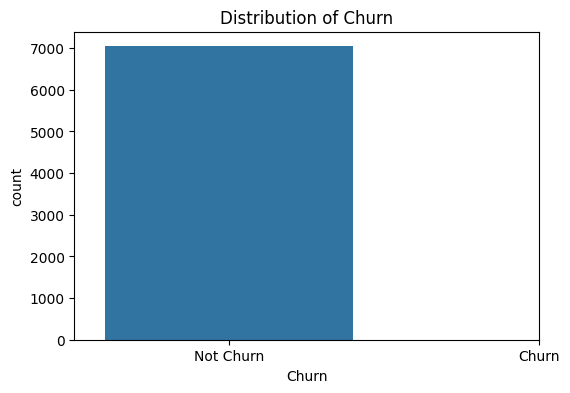

In [ ]:
# 1. Overview of Churn Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data['Churn'])
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.xticks(ticks=[0, 1], labels=['Not Churn', 'Churn'])
plt.show()

According to the countplot the distribution of churn in the dataframe is uneven

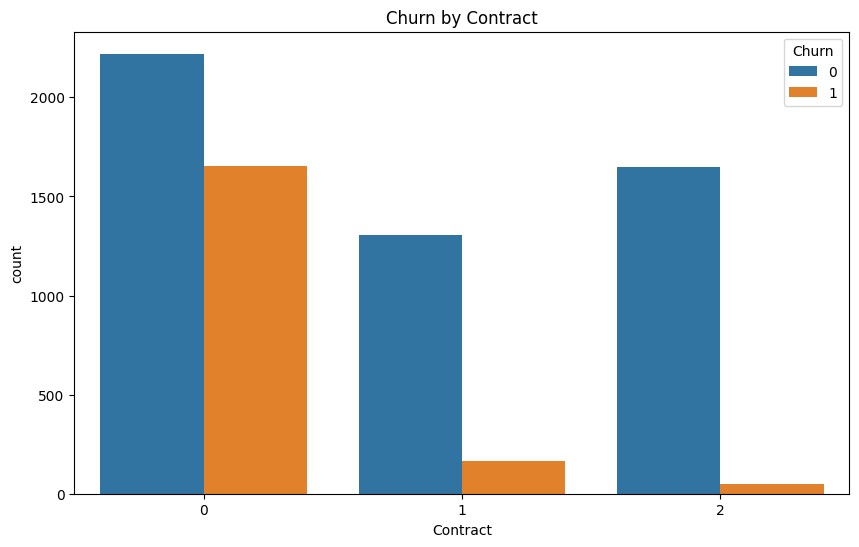

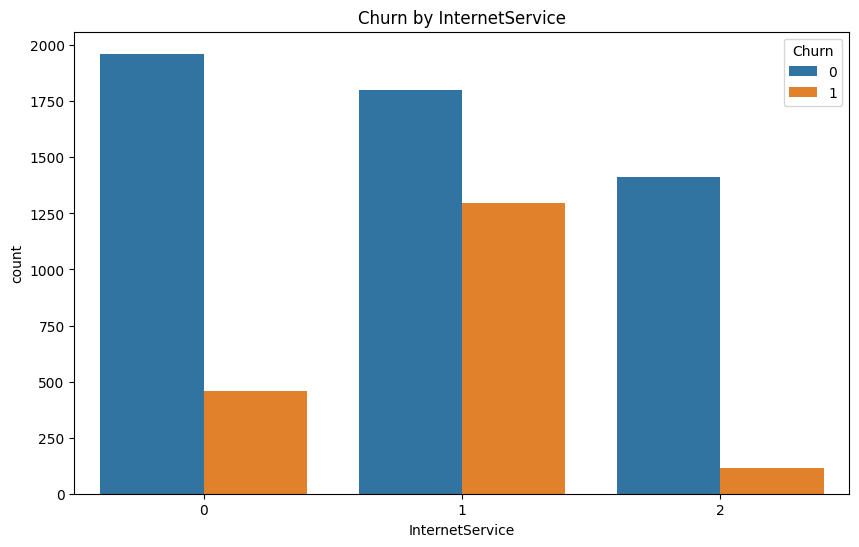

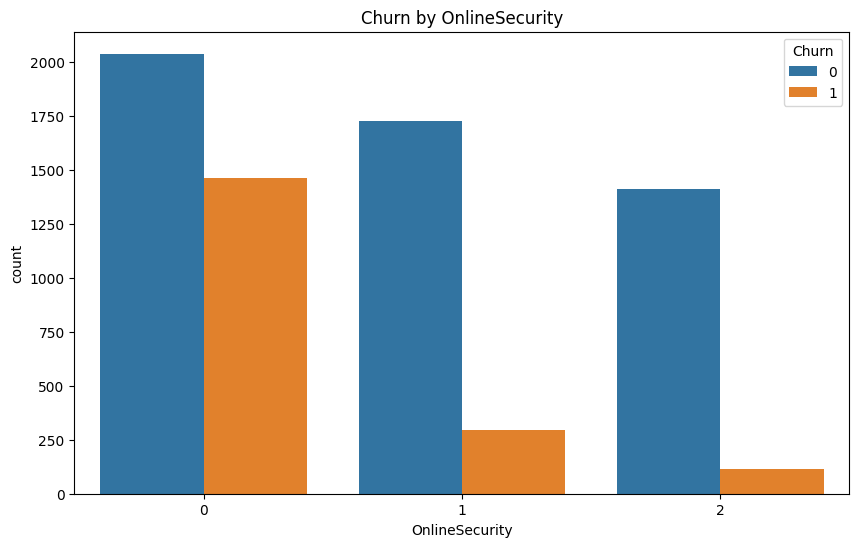

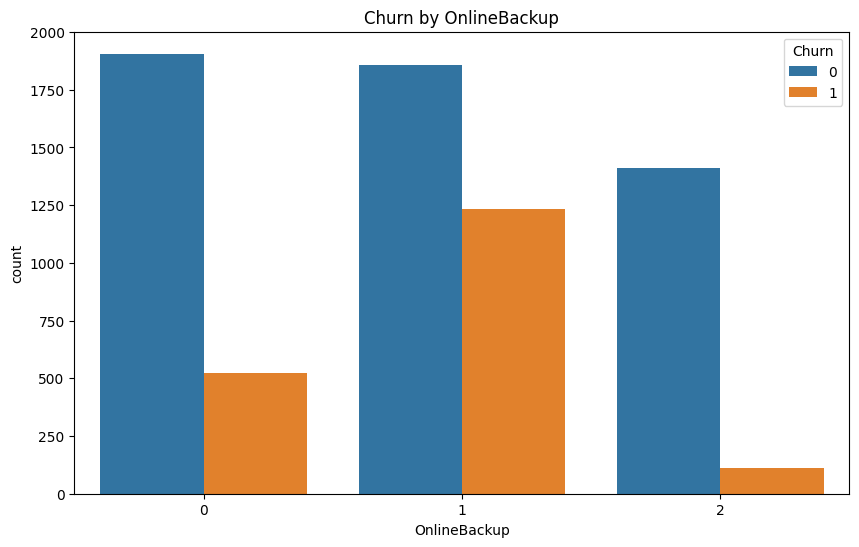

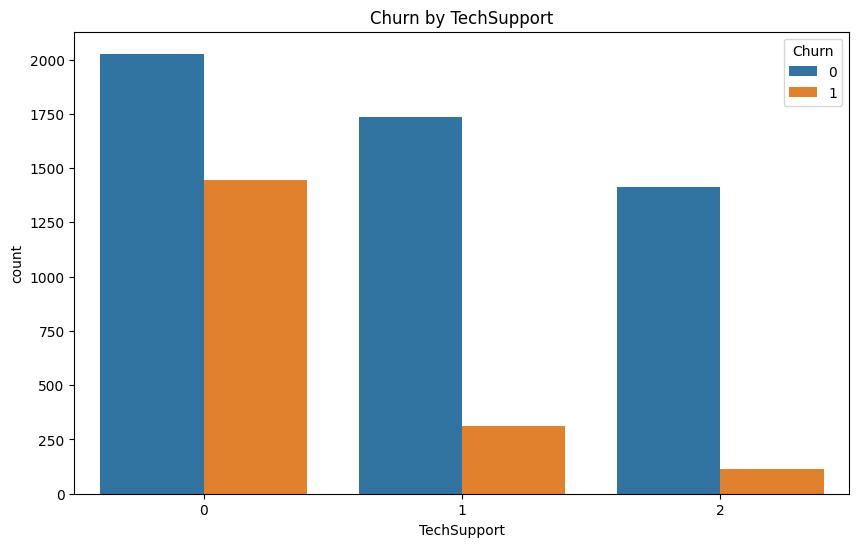

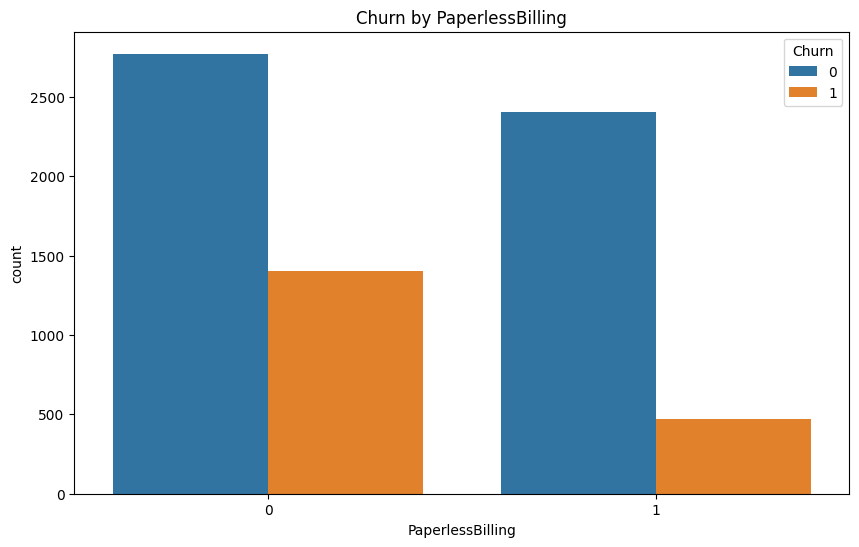

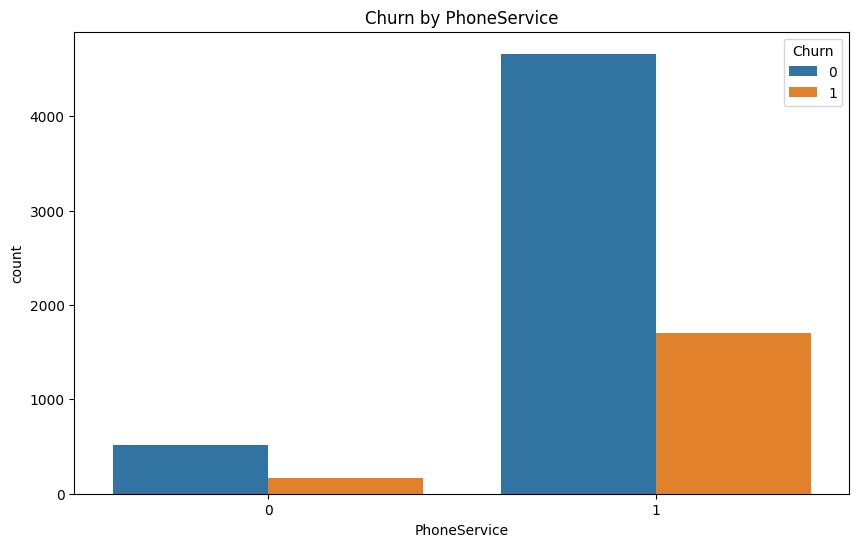

In [ ]:
# 2. Churn by Categorical Features
# List of categorical columns
categorical_columns = ['Contract', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'TechSupport', 'PaperlessBilling', 'PhoneService']

for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=select_df[column], hue=data['Churn'])
    plt.title(f'Churn by {column}')
    plt.show()

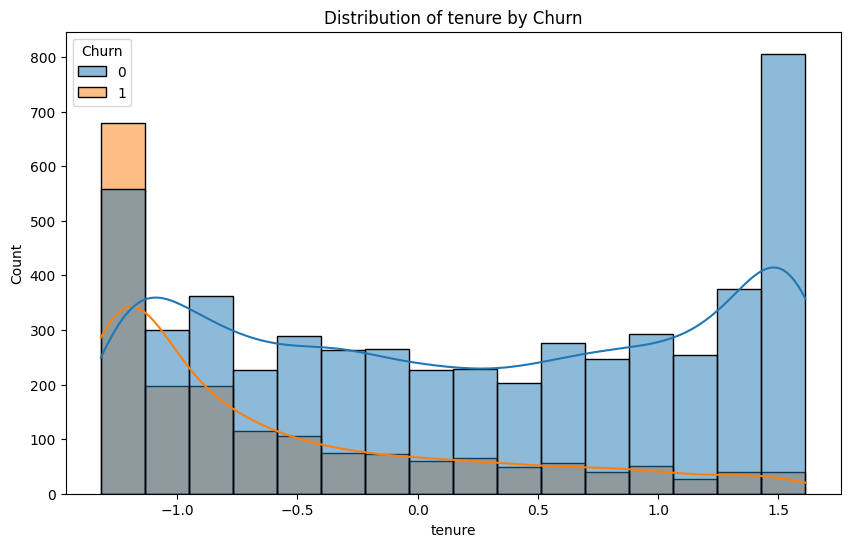

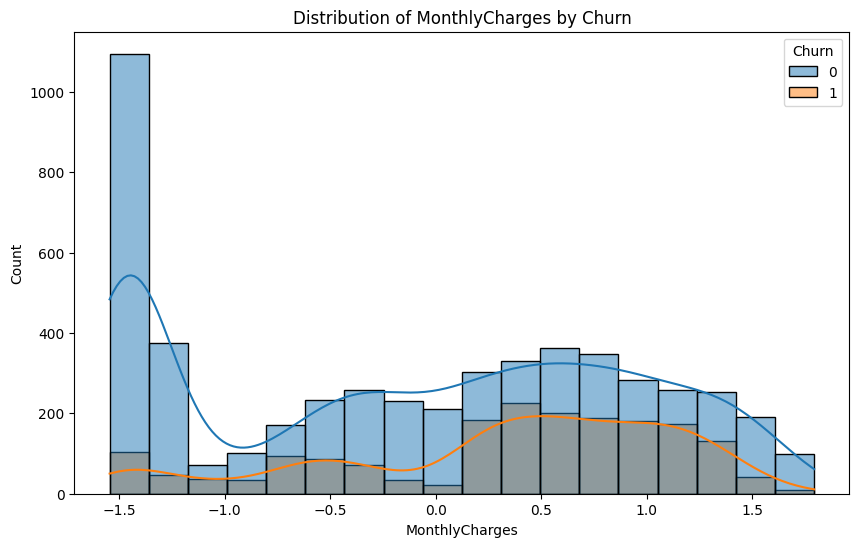

In [ ]:
# 3. Churn by Numerical Features
numerical_columns = ['tenure', 'MonthlyCharges']

for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(x=select_df[column], kde=True, hue=data['Churn'])
    plt.title(f'Distribution of {column} by Churn')
    plt.show()

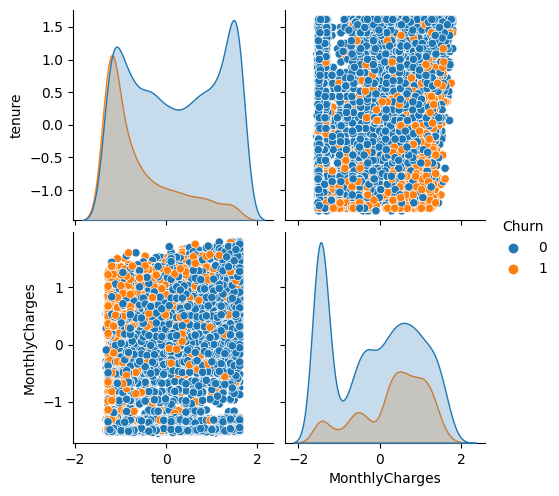

In [ ]:
# 4. Pair Plots for Numerical Features
sns.pairplot(select_df, hue='Churn', vars=numerical_columns)
plt.show()

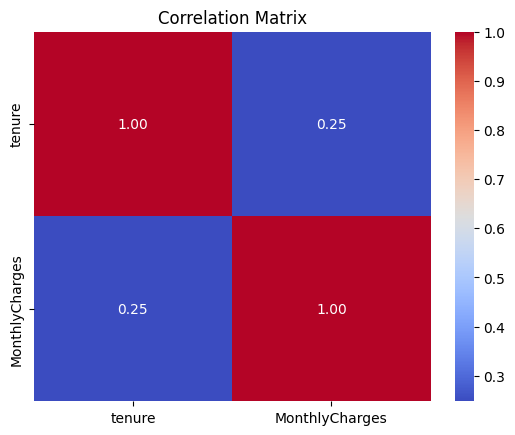

In [ ]:
# 5. Correlation Matrix
correlation_matrix = select_df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

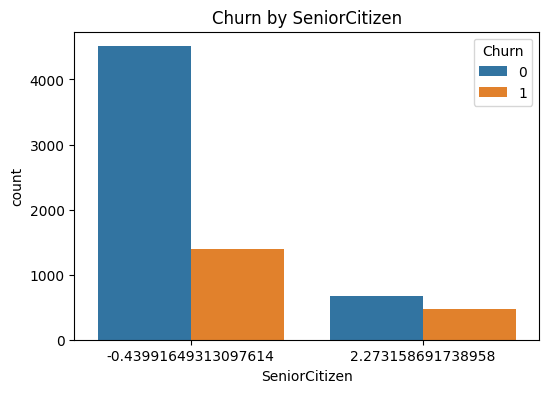

In [ ]:
# 6. Churn by SeniorCitizen
plt.figure(figsize=(6, 4))
sns.countplot(x=select_df['SeniorCitizen'], hue=data['Churn'])
plt.title('Churn by SeniorCitizen')
plt.show()

**Some Key insights from EDA**
1. From the churn by senior citizen graph it is safe to infer data being a senior citizen influences whether a customer will churn or not.
2. As tenure increases i.e the value of tenure churn decreases i.e the number of customers who churn out increase.
3. The higher the monthly charges the higher the number of customers who churn out.



# ***Model training***

Separating independent and dependent variables for model training using the dataframe we were using for EDA

1. dependent variable

In [ ]:
Y= select_df["Churn"]

In [ ]:
Y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

2. Independent variable

In [ ]:
X = select_df.drop(["Churn"], axis = 1)

In [ ]:
X.head()

,Contract,tenure,OnlineSecurity,MonthlyCharges,InternetService,OnlineBackup,TechSupport,SeniorCitizen,PaperlessBilling,PhoneService
0,0,-1.277445,0,-1.160323,0,0,0,-0.439916,0,0
1,1,0.066327,1,-0.259629,0,1,0,-0.439916,1,1
2,0,-1.236724,1,-0.362660,0,0,0,-0.439916,0,1
3,1,0.514251,1,-0.746535,0,1,1,-0.439916,1,0
4,0,-1.236724,0,0.197365,1,1,0,-0.439916,0,1


**scaling the independent variable to avoid bias **

In [ ]:
scaled = StandardScaler()
scaleddata = scaled.fit_transform(X)
X = pd.DataFrame(scaleddata, columns = X.columns)
X

,Contract,tenure,OnlineSecurity,MonthlyCharges,InternetService,OnlineBackup,TechSupport,SeniorCitizen,PaperlessBilling,PhoneService
0,-0.828207,-1.277445,-0.903589,-1.160323,-1.183234,-1.180777,-0.909172,-0.439916,-0.829798,-3.054010
1,0.371271,0.066327,0.351386,-0.259629,-1.183234,0.173655,-0.909172,-0.439916,1.205113,0.327438
2,-0.828207,-1.236724,0.351386,-0.362660,-1.183234,-1.180777,-0.909172,-0.439916,-0.829798,0.327438
3,0.371271,0.514251,0.351386,-0.746535,-1.183234,0.173655,0.347362,-0.439916,1.205113,-3.054010
4,-0.828207,-1.236724,-0.903589,0.197365,0.172250,0.173655,-0.909172,-0.439916,-0.829798,0.327438
...,...,...,...,...,...,...,...,...,...,...
7038,0.371271,-0.340876,0.351386,0.665992,-1.183234,0.173655,0.347362,-0.439916,-0.829798,0.327438
7039,0.371271,1.613701,-0.903589,1.277533,0.172250,-1.180777,-0.909172,-0.439916,-0.829798,0.327438
7040,-0.828207,-0.870241,0.351386,-1.168632,-1.183234,0.173655,-0.909172,-0.439916,-0.829798,-3.054010
7041,-0.828207,-1.155283,-0.903589,0.320338,0.172250,0.173655,-0.909172,2.273159,-0.829798,0.327438


In [ ]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y, test_size = 0.1, random_state =42, stratify= Y)

In [ ]:
Xtrain.head()

,Contract,tenure,OnlineSecurity,MonthlyCharges,InternetService,OnlineBackup,TechSupport,SeniorCitizen,PaperlessBilling,PhoneService
5769,1.570749,1.572981,0.351386,1.470302,0.172250,-1.180777,-0.909172,-0.439916,-0.829798,0.327438
1834,-0.828207,-1.277445,-0.903589,-0.653475,-1.183234,0.173655,-0.909172,2.273159,1.205113,0.327438
3168,0.371271,0.717853,1.606361,-1.509300,1.527734,1.528087,1.603896,-0.439916,-0.829798,0.327438
4205,1.570749,-0.340876,0.351386,0.459929,-1.183234,0.173655,-0.909172,-0.439916,1.205113,0.327438
6218,0.371271,1.532261,-0.903589,-0.211437,-1.183234,-1.180777,0.347362,-0.439916,-0.829798,-3.054010


**Training the initial model**

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense (Dense)               (None, 12)                132       
                                                                 
 dropout (Dropout)           (None, 12)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 145 (580.00 Byte)
Trainable params: 145 (580.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
302/302 [==============================] - 11s 4ms/step - loss: 0.5115 - accuracy: 0.7442 - val_loss: 0.4153 - val_accuracy: 0.8071
Epoch 2/100

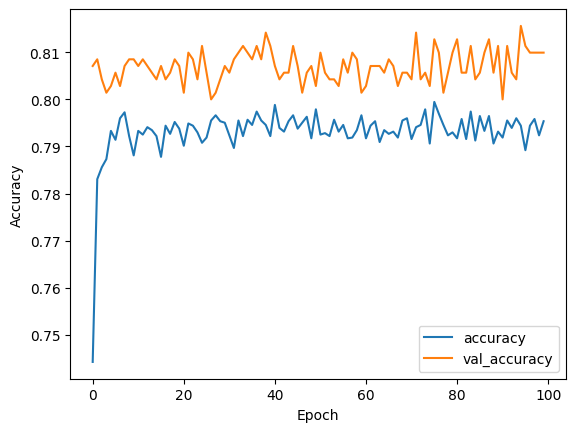

In [ ]:

# Define the input layer
input_layer = Input(shape=(Xtrain.shape[1],))

# Define the hidden layers with dropout
hidden_layer1 = Dense(12, activation='tanh')(input_layer)
dropout_layer = Dropout(0.5)(hidden_layer1)

# Define the output layer
output_layer = Dense(1, activation='sigmoid')(dropout_layer)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer=Adamax(learning_rate=0.01),
              loss=BinaryCrossentropy(),
              metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
history = model.fit(Xtrain, Ytrain, epochs=100, batch_size=21, validation_split=0.2, validation_data=(Xtest, Ytest))

# Evaluate and print results
loss, accuracy = model.evaluate(Xtest, Ytest)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')

# Plot the training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


# Evaluate the model’s accuracy and calculate the AUC score

In [ ]:
ypredict = model.predict(Xtest)
ypredict = (ypredict>0.5).astype(int)

23/23 [==============================] - 0s 2ms/step


In [ ]:
print(roc_auc_score(Ytest,ypredict))

0.7288470670823612


In [ ]:
print(accuracy_score(Ytest,ypredict))

0.8099290780141843


# optimised the model

In [58]:


def create_model(learning_rate=0.01, activation='relu', neurons=3, optimizer='adam'):
    input_layer1 = Input(shape=(Xtrain.shape[1],))
    input_layer2 = Dense(9, activation = activation)(input_layer1)
    output_layer1 = Dense(1, activation='sigmoid')(input_layer2)
    model = keras.Model(inputs=input_layer1, outputs=output_layer1)

    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)

    elif optimizer == 'adagrad':
        opt = Adagrad(learning_rate=learning_rate)
    elif optimizer == 'adadelta':
        opt = Adadelta(learning_rate=learning_rate)
    elif optimizer == 'nadam':
        opt = Nadam(learning_rate=learning_rate)

    elif optimizer == 'rmsprop':
        opt = RMSprop(learning_rate=learning_rate)

    else:
        opt = Adam(learning_rate=learning_rate)

    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(model=create_model,learning_rate = 0.1, activation = "relu",neurons=3, epochs=25, batch_size=21, verbose=0)


param_grid = {
    'learning_rate': [0.01, 0.001, 0.0001],
    'activation': ['relu', 'sigmoid', 'tanh'],
    'neurons': [3, 6, 12],
    'optimizer': ['adam', 'rmsprop', 'sgd']
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(Xtrain, Ytrain)


print("Best_model: %f uses %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']


Best_model: 0.802618 uses {'activation': 'relu', 'learning_rate': 0.01, 'neurons': 6, 'optimizer': 'sgd'}


# train and tested again

Epoch 1/600
187/187 [==============================] - 1s 4ms/step - loss: 0.6833 - accuracy: 0.6859 - val_loss: 0.5327 - val_accuracy: 0.7504
Epoch 2/600
187/187 [==============================] - 1s 4ms/step - loss: 0.5771 - accuracy: 0.7345 - val_loss: 0.5015 - val_accuracy: 0.7348
Epoch 3/600
187/187 [==============================] - 1s 7ms/step - loss: 0.5412 - accuracy: 0.7425 - val_loss: 0.4871 - val_accuracy: 0.7348
Epoch 4/600
187/187 [==============================] - 1s 4ms/step - loss: 0.5326 - accuracy: 0.7435 - val_loss: 0.4798 - val_accuracy: 0.7348
Epoch 5/600
187/187 [==============================] - 1s 4ms/step - loss: 0.5303 - accuracy: 0.7485 - val_loss: 0.4746 - val_accuracy: 0.7348
Epoch 6/600
187/187 [==============================] - 1s 4ms/step - loss: 0.5231 - accuracy: 0.7494 - val_loss: 0.4705 - val_accuracy: 0.7348
Epoch 7/600
187/187 [==============================] - 1s 4ms/step - loss: 0.5264 - accuracy: 0.7506 - val_loss: 0.4702 - val_accuracy: 0.7348

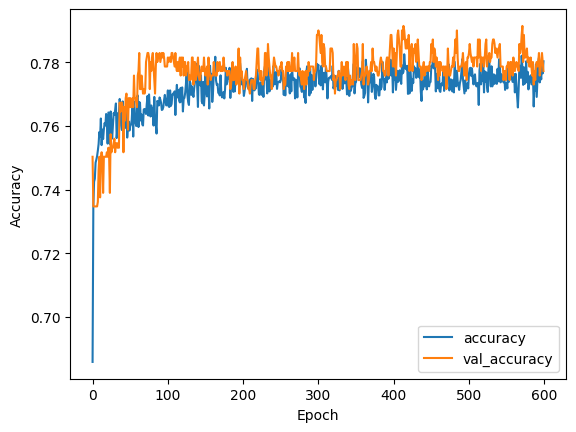

In [70]:


# Define the input layer for the final model
input_layer_final = Input(shape=(Xtrain.shape[1],))
hidden_layer1_final = Dense(6, activation="relu")(input_layer_final)
dropout_layer_final = Dropout(0.7)(hidden_layer1_final)
output_layer_final = Dense(1, activation='sigmoid')(dropout_layer_final)

# Create the final model
churn_model = Model(inputs=input_layer_final, outputs=output_layer_final)

# Compile the final model
churn_model.compile(optimizer=SGD(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Train the final model
history_final = churn_model.fit(Xtrain, Ytrain, epochs=600, batch_size=34, validation_split=0.2, validation_data=(Xtest, Ytest))

# Evaluate and print results for the final model
loss_final, accuracy = model.evaluate(Xtest, Ytest)
print(f'Test loss: {loss_final}, Test accuracy: {accuracy}')
churn_final, accuracy_final = churn_model.evaluate(Xtest, Ytest)
print(f'Test loss: {loss_final}, Test accuracy: {accuracy_final}')

# Plot the training history for the final model
plt.plot(history_final.history['accuracy'], label='accuracy')
plt.plot(history_final.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


# Evaluate the model's accuracy and calculate the AUC score again after optimising

In [60]:

pred_churn_model = churn_model.predict(Xtest)
pred_churn_model[1:5]


23/23 [==============================] - 0s 2ms/step


array([[0.00502087],
       [0.42379782],
       [0.01182589],
       [0.38042974]], dtype=float32)

roc_auc_score

In [61]:
print(roc_auc_score(Ytest,pred_churn_model))

0.8502931885284828


# saving the trained model


In [66]:
import joblib

joblib.dump(scaleddata, '/content/drive/My Drive/AI/datascaler.joblib')
joblib.dump(churn_model, '/content/drive/My Drive/AI/churn_model.joblib')
churn_model.save("/content/drive/My Drive/AI/churn_model")